# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [5]:
# Your work here.
import matplotlib.pyplot as plt
%matplotlib inline
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


One way to check whether the distribution of body temperatures is normal, is to look at a histogram of the temperatures. The first histogram shows the distribution of temperatures, and the second histogram displays the same data using z-scores.

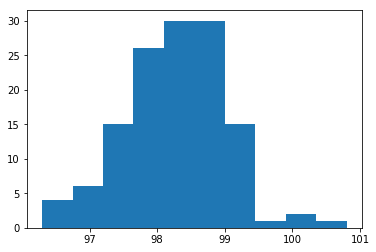

In [12]:
plt.hist(df['temperature'])
plt.show()

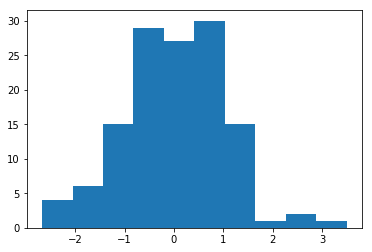

In [13]:
plt.hist(stats.zscore(df['temperature']))
plt.show()

The histograms look fairly normally distributed (bell shaped). The two histograms below show the distributions of male and female temperatures, respectively. Both histograms look normally distributed.

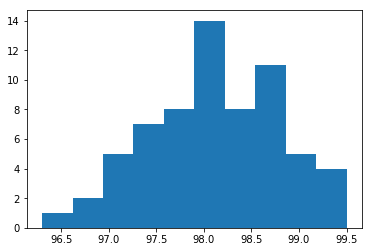

In [31]:
plt.hist(df['temperature'][df.gender=='M'])
plt.show()

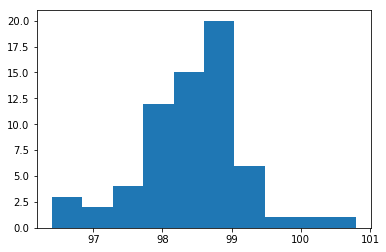

In [32]:
plt.hist(df['temperature'][df.gender=='F'])
plt.show()

Box plots can't be used to check for normality, but they can show if the data is symmetric. The second box plot shows the data using z-scores.

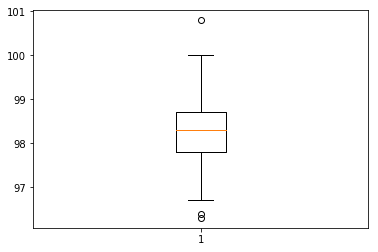

In [11]:
plt.boxplot(df['temperature'])
plt.show()

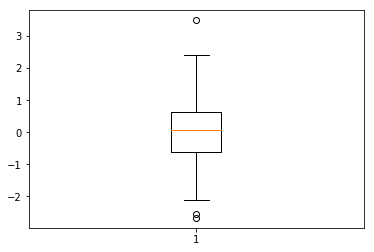

In [14]:
plt.boxplot(stats.zscore(df['temperature']))
plt.show()

The data appears to be symmetric abour the mean, and there are a few outliers.

A Q-Q plot is another method that can be used to compare data to a distribution. 

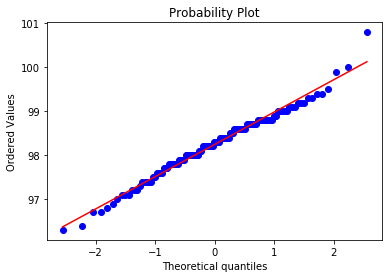

In [10]:
import pylab 
import scipy.stats as stats
stats.probplot(df['temperature'], dist="norm", plot=pylab)
pylab.show()

The data fit the trend line pretty well, so the data is roughly normal.

In [3]:
len(df)

130

There are 130 total observations, which is greater than 30, so the sample size is large. 

In [33]:
df['gender'].value_counts()

M    65
F    65
Name: gender, dtype: int64

There are equal amounts of male and female observations, so the observations might not be independent. Perhaps only couples could have been tested, and if one spouse has high/low temperature it is probably more likely that the other spouse has high/low temperature.

I use a one sample test, since I am comparing the data to a theoretical mean. A z-test is used since the sample size is large. The hypothesis is $\mu=98.6$, and the alternative hypothesis is $\mu\neq98.6$.

In [34]:
from statsmodels.stats.weightstats import ztest
ztest(df['temperature'],value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

If instead I use a one sample t-test, the p-value is larger. This is because a t-test uses the sample standard deviation, which is more uncertain than the population standard deviation, causing the result to be less confident.

In [40]:
from scipy.stats import ttest_1samp, ttest_ind
ttest_1samp(df['temperature'],98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

If the sample size is 10, the appropriate test to use is the t-test because the sample size is small. Again, the p-value for the t-test is larger than the p-value for the z-test, showing that we are less confident in our results.

In [37]:
import numpy as np
random_sample = np.random.choice(df['temperature'],size=10)

In [39]:
ztest(random_sample,value=98.6)

(-2.4141597121779355, 0.015771547373253487)

In [38]:
ttest_1samp(random_sample,98.6)

Ttest_1sampResult(statistic=-2.4141597121779355, pvalue=0.038982206391312342)

To test whether there is a significant difference between males and females in normal temperatures, I use a two sample t-test. This is because I am sampling from normally distributed populations where population variances are unknown.

The margin of error of a confidence interval is the value that is added/subtracted from the sample mean to find the length of the interval. For a 95% confidence interval, this value is:

In [43]:
margin_error = 1.96*np.std(df.temperature)/np.sqrt(len(df))
margin_error

0.12555096480257899

We will consider someone to have abnormal temperature, if their temperature lies outside of the 95% confidence interval defined by:

In [47]:
print('below {}'.format(np.mean(df.temperature)-margin_error))
print('above {}'.format(np.mean(df.temperature)+margin_error))

below 98.12367980442819
above 98.37478173403336


In [41]:
ttest_ind(df.temperature[df.gender=='M'],df.temperature[df.gender=='F'])

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

At an $\alpha$ of 0.5, we reject the null hypothesis that men and women have the same normal temperature (p=0.024).